In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mesa_reader as mr

In [4]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [5]:
def formatstring(myfloat):
    return '%.5f'%myfloat

In [6]:
mpList = list(np.linspace(5.3,6.3,11))
for i, m in enumerate(mpList):
    mpList[i] = formatstring(m)
    
fList = list(np.logspace(-4,np.log10(2*(10**-2)),10))
for j, f in enumerate(fList):
    fList[j] = formatstring(f)
    
entropyList = [7.21, 7.22, 7.22, 7.22, 7.23, 7.23, 7.24, 7.24, 7.24, 7.25, 7.25]
for k, ent in enumerate(entropyList):
    entropyList[k] = formatstring(ent)

In [7]:
def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

def calcX(history):
    return history.Hydrogen_Mass / history.envelope_mass

def calcY(history):
    return history.He4_Mass / history.envelope_mass

def calcZ(history):    
    return 1 - calcX(history) - calcY(history)

def deltaf(history):
    initf = history.envelope_mass[0] / (history.star_mass[0] * msun)
    finf = history.envelope_mass[-1] / (history.star_mass[-1] * msun)
    return finf - initf 

def deltam(history):
    initm = history.star_mass[0] * mfrac
    finm = history.star_mass[-1] * mfrac
    return finm - initm

In [7]:
masses = []
radii = []
fs = []
deltams = []
deltafs = []
ages = []

for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/146b_mar9/hist_evolve_%s_%s_0.24000_0.02000_0.02584_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses.append(h.star_mass*mfrac)
        radii.append(h.radius*rfrac)
        fs.append(envelope_fraction(h))
        ages.append(h.star_age)
        
        deltams.append(deltam(h))
        deltafs.append(deltaf(h))

In [13]:
cmap = plt.get_cmap('viridis')

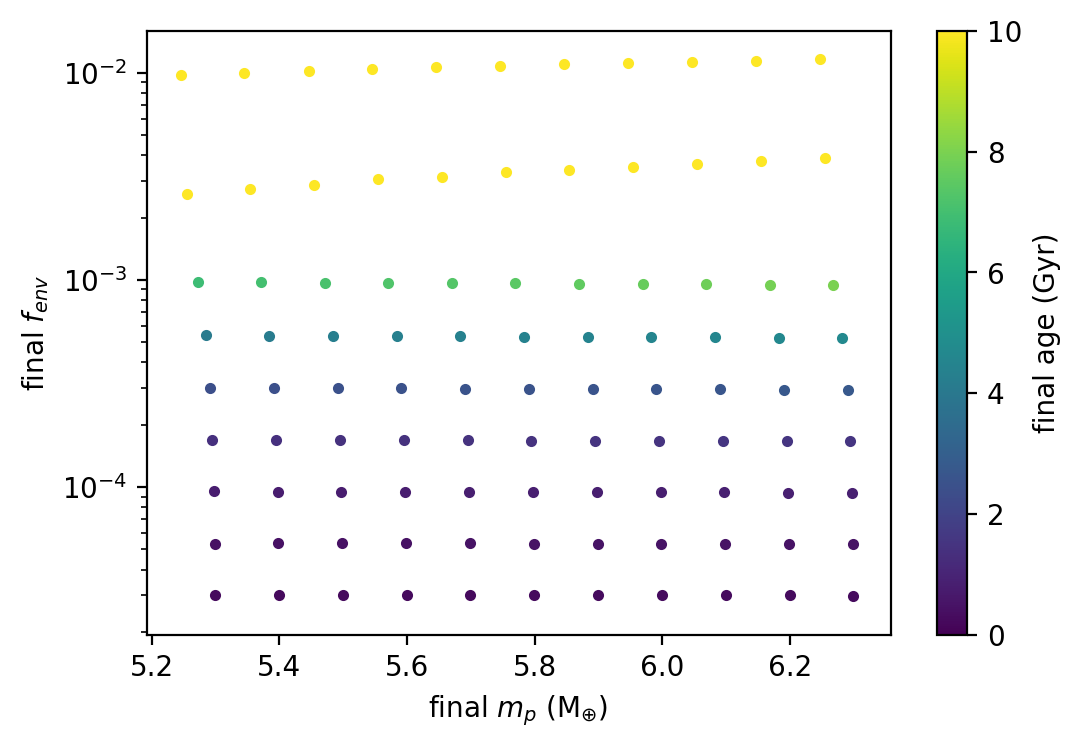

In [10]:
for i in range(0,len(masses)):
    thiscolor = (ages[i][-1]) / (1e10)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
#plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('final $m_p$ (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([0,2,4,6,8,10])
cbar.set_label('final age (Gyr)')

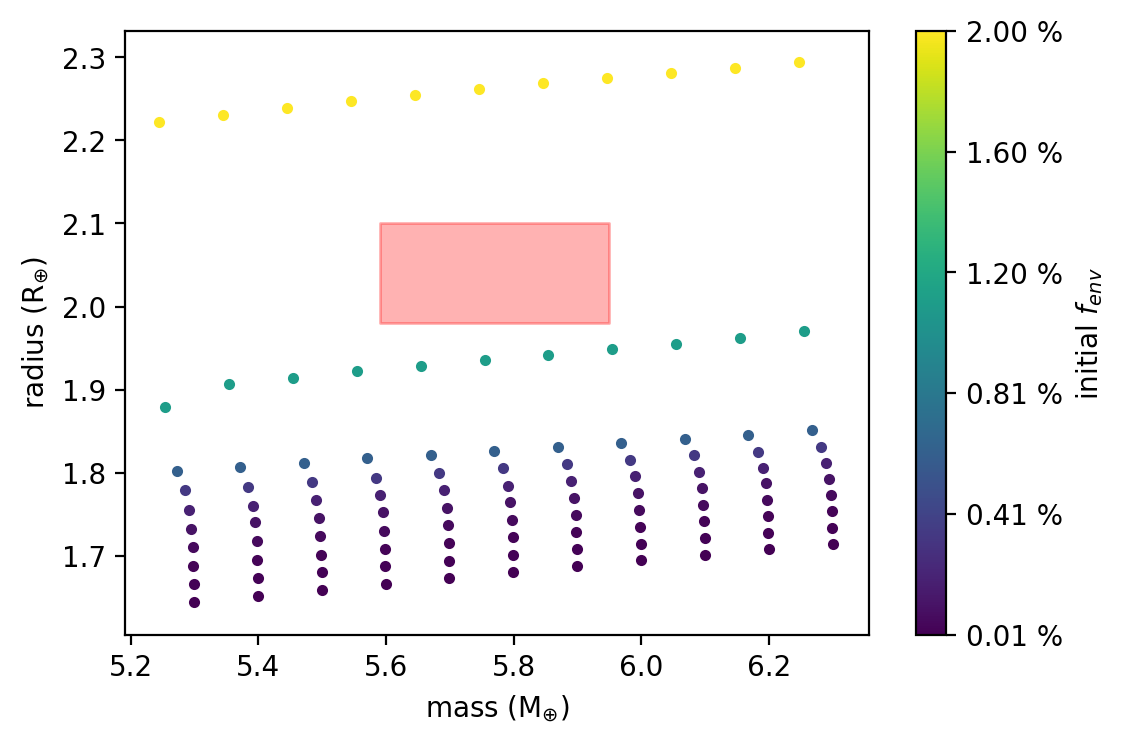

In [11]:
figmr = plt.figure()
axmr = plt.gca()

absmin = 1.0e-4
absmax = np.max(np.hstack(fs))

for i in range(0,len(masses)):
    #else:
    #plt.plot(masses[i][0],radii[i][0],'b.',alpha=0.3,markeredgewidth=0)
    thiscolor = (fs[i][0] - absmin) / (absmax - absmin)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],radii[i][-1],color=cmap(thiscolor),marker='.')
    
figmr.set_dpi(200)    
axmr.set_xlabel('mass (M$_{\oplus}$)')
axmr.set_ylabel('radius (R$_{\oplus}$)')
#axmr.legend(loc=0)


#mass 5.77 +/- 0.18 
#radius 2.04 +/- 0.06

meas_m = 5.77
delta_meas_m = 0.18
meas_r = 2.04
delta_meas_r = 0.06
axmr.fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

'''for i in range(0,110):
    dx = masses[i][-1] - masses [i][0]
    dy = radii[i][-1] - radii[i][0]
    plt.arrow(masses[i][0],radii[i][0],dx,dy,width=0.005,linewidth=0,length_includes_head=True)
plt.plot(masses[0][-1],radii[0][-1],'k.')'''

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (absmax-absmin) + absmin
labels = ['%.2f %%'%(label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

In [10]:
np.savez('146b_data',masses=np.array(masses),radii=radii,fs=fs,ages=ages)

In [11]:
#print(ages)

In [12]:
fList2 = list(np.linspace(0.005,0.05,10))
for j, f in enumerate(fList2):
    fList2[j] = formatstring(f)

In [13]:
masses2 = []
radii2 = []
fs2 = []
deltams2 = []
deltafs2 = []
ages2 = []

for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList2):
        h = mr.MesaData('data/146b_fine_mar14/hist_evolve_%s_%s_0.24000_0.02000_0.02584_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses2.append(h.star_mass*mfrac)
        radii2.append(h.radius*rfrac)
        fs2.append(envelope_fraction(h))
        ages2.append(h.star_age)
        
        deltams2.append(deltam(h))
        deltafs2.append(deltaf(h))

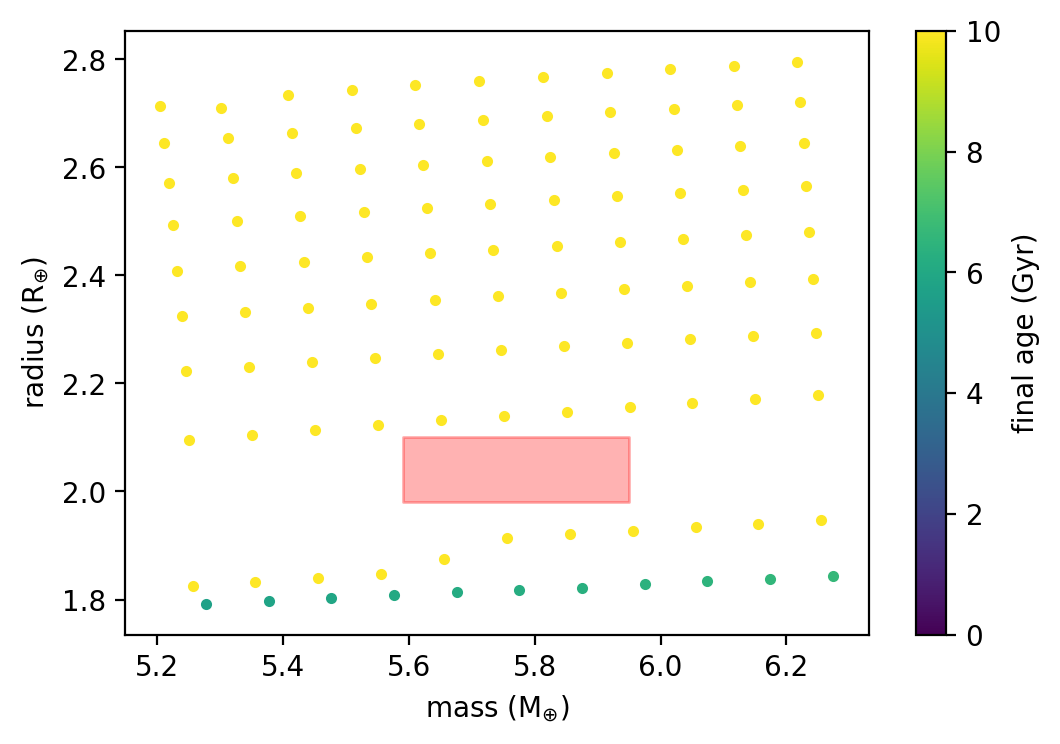

In [14]:
for i in range(0,len(masses2)):
    thiscolor = (ages2[i][-1]) / (1e10)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses2[i][-1],radii2[i][-1],marker='.',color=cmap(thiscolor))
    
plt.gcf().set_dpi(200)    
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([0,2,4,6,8,10])
cbar.set_label('final age (Gyr)')

meas_m = 5.77
delta_meas_m = 0.18
meas_r = 2.04
delta_meas_r = 0.06
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

In [15]:
np.savez('146b_data2',masses2=np.array(masses2),radii2=radii2,fs2=fs2,ages2=ages2)

In [31]:
fList3 = list(np.linspace(0.004,0.014,11)) + list(np.linspace(0.015,0.02,6))
#print(fList3)
for j, f in enumerate(fList3):
    fList3[j] = formatstring(f)
    
mpList3 = list(np.arange(5.1, 6.6+0.1, 0.1))
#print(mpList3)
for j, m in enumerate(mpList3):
    mpList3[j] = formatstring(m)
    
entropyList3 = [7.20, 7.21, 7.21, 7.22, 7.22, 7.22, 7.23, 7.23, 7.24, 7.24, 7.24, 7.25, 7.25, 7.26, 7.26, 7.26]
for j, ent in enumerate(entropyList3):
    entropyList3[j] = formatstring(ent)

16
16


In [32]:
masses3 = []
radii3 = []
fs3 = []
deltams3 = []
deltafs3 = []
ages3 = []

for i, m in enumerate(mpList3):
    ent = entropyList3[i]
    
    for j, f in enumerate(fList3):
        #print('data/b_fine/hist_evolve_%s_%s_0.24000_0.02000_0.02584_%s_0.10000.data'%(m,f,ent))
        h = mr.MesaData('data/b_fine/hist_evolve_%s_%s_0.24000_0.02000_0.02584_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses3.append(h.star_mass*mfrac)
        radii3.append(h.radius*rfrac)
        fs3.append(envelope_fraction(h))
        ages3.append(h.star_age)
        
        deltams3.append(deltam(h))
        deltafs3.append(deltaf(h))

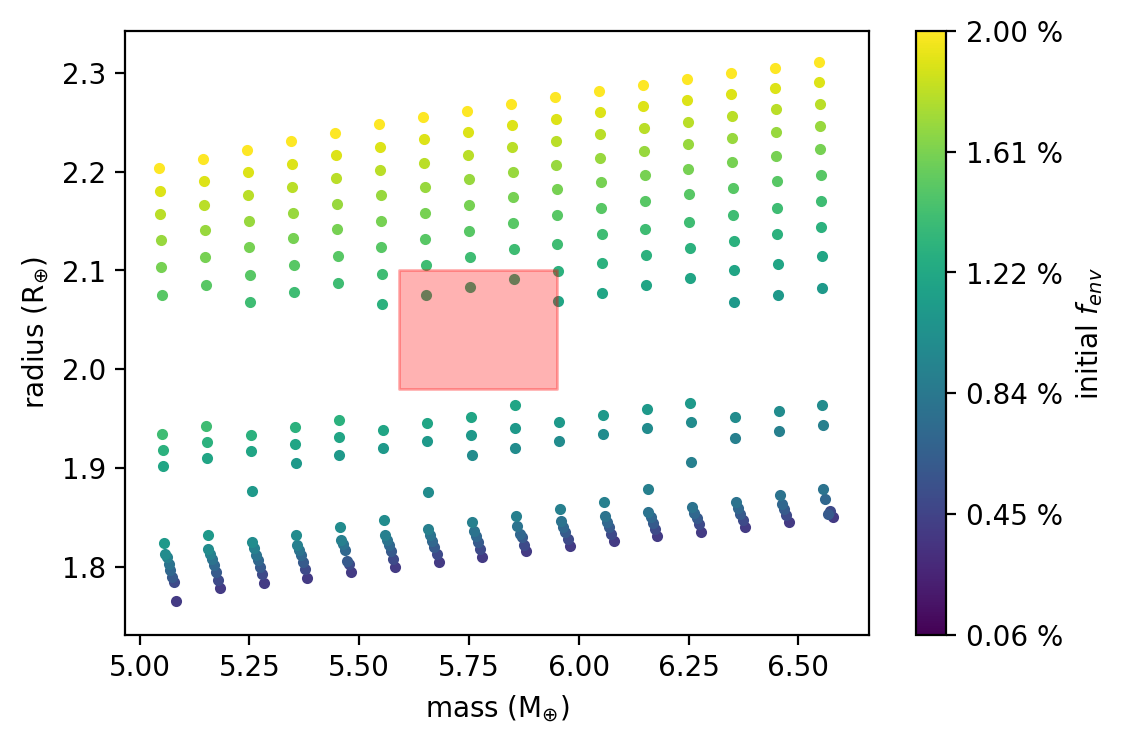

In [33]:
absmin = np.min(np.hstack(fs3))#1.0e-4
absmax = np.max(np.hstack(fs3))

for i in range(0,len(masses3)):
    thiscolor = (fs3[i][0] - absmin) / (absmax - absmin)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses3[i][-1],radii3[i][-1],marker='.',color=cmap(thiscolor))
    
plt.gcf().set_dpi(200)    
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (absmax-absmin) + absmin
labels = ['%.2f %%'%(label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

meas_m = 5.77
delta_meas_m = 0.18
meas_r = 2.04
delta_meas_r = 0.06
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

In [34]:
np.savez('146b_data3',masses3=np.array(masses3),radii3=radii3,fs3=fs3,ages3=ages3)

In [35]:
print(len(radii3))
print(np.array(masses3).shape)

272
(272,)
